# Six-letter words

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import fem
data_dir = '../../data/words'
print 'number of threads: %i' % (fem.fortran_module.fortran_module.num_threads(),)

number of threads: 32


In [2]:
words = np.loadtxt(os.path.join(data_dir, '06.txt'), dtype='U6')
unique_words = np.unique(words)
print 'number of words: %i, number of unique words: %i' % (len(words), len(unique_words))

number of words: 633565, number of unique words: 20083


In [3]:
print 'random word:', np.random.choice(words)

random word: little


In [4]:
words = np.array([np.array(list(word)) for word in words]).T
n, l = words.shape
print 'word length (n): %i, number of words (l): %i' % (n, l)

word length (n): 6, number of words (l): 633565


In [18]:
iters = 10
x, y = words.copy(), words.copy()
par, disc = fem.fit.fit(x, y, degs=[1], iters=iters)

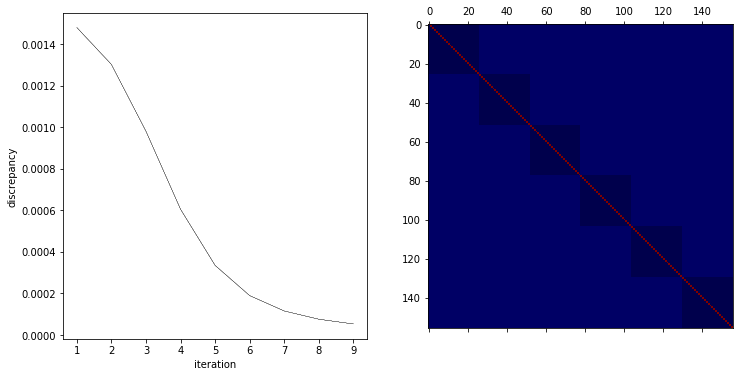

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
for d in disc:
    ax[0].plot(range(1, iters), d, 'k-', lw=0.1)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')

ax[1].matshow(par[1], aspect='equal', cmap=plt.cm.seismic)

In [98]:
ltn = dict(zip(list('abcdefghijklmnopqrstuvwxyz'),range(26)))
ntl = dict(zip(range(26),list('abcdefghijklmnopqrstuvwxyz')))
x = np.zeros(6*26)
j = np.random.randint(words.shape[1])
k = np.random.randint(6)
print k
print ''.join(words[:,j])
x[[26*i+ltn[l] for i,l in enumerate(words[:,j])]] = 1
x[k*26:(k+1)*26] = 0
print ''.join([ntl[n] for n in np.argmax(np.split(par[1].dot(x), 6), axis=1)])

4
friday
fridqy


In [7]:
import fem
iters = 20

m = np.array([len(np.unique(l)) for l in words])
m_sum = m.sum()
m_cumsum = np.insert(m.cumsum(), 0, 0)

data_files = [os.path.join(data_dir, f) for f in ['h1.npy', 'disc.npy']]

if np.all([os.path.exists(f) for f in data_files]):
    h1, disc = [np.load(f) for f in data_files]
else:
    start = time.time()
    par, disc = [], []
    for i in range(n):
        not_i = list(set(range(n)) - {i})
        x, y = words[not_i], words[i]
        res = fem.fit.fit(x, y, degs=[1], iters=iters)
        par.append(res[0])
        disc.append(np.squeeze(res[1]))
    end = time.time()
    print '%02f minutes' % ((end-start)/60.,) # 5.56569569906 minutes
    
    h1 = np.zeros(shape=(m_sum, m_sum))
    for i in range(n):
        m1, m2 = m_cumsum[i], m_cumsum[i+1]
        h1[m1:m2, :m1] = par[i][1][:,:m1]
        h1[m1:m2, m2:] = par[i][1][:,m1:]
    np.save(data_files[0], h1)

    disc = np.array(disc)
    np.save(data_files[1], disc)

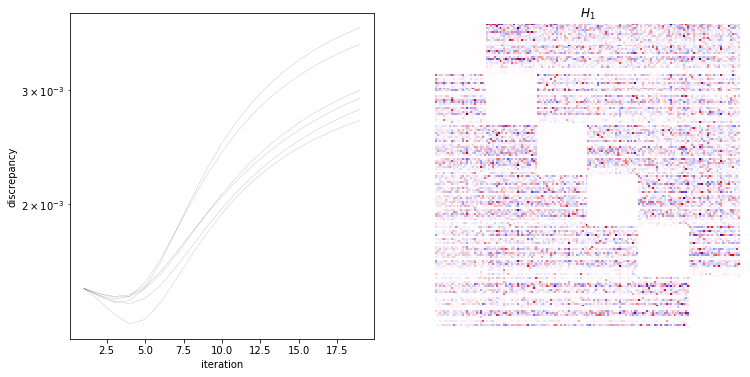

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for d in disc:
    ax[0].semilogy(range(1, 20), d, 'k-', lw=0.1)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')

for i in range(n):
    i1, i2 = m_cumsum[i], m_cumsum[i+1]
    h1[:, i1:i2] -= h1[:, i1:i2].mean(1)[:,np.newaxis]
scale = np.abs(h1).max()
ax[1].imshow(h1, aspect='equal', cmap=plt.cm.seismic, vmin=-scale, vmax=scale)
ax[1].axis('off')
ax[1].set_title('$H_1$')

plt.show()

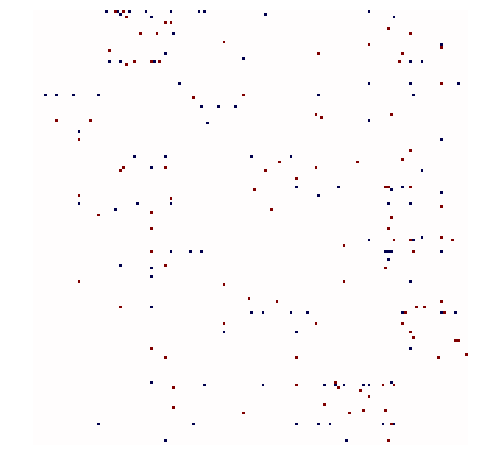

In [9]:
h1_filter = h1.flatten()
order = h1_filter.argsort()
bottom, top = order[:100], order[-100:]
zeros = list(set(range(len(h1_filter))) - set(top) - set(bottom))
h1_filter[zeros] = 0
h1_filter = h1_filter.reshape((6*26, 6*26))

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.imshow(h1_filter, aspect='equal', cmap=plt.cm.seismic, vmin=-1, vmax=1)
ax.axis('off')
plt.show()

In [10]:
np.where(h1_filter > 0), np.where(h1_filter < 0)

((array([  0,   0,   2,   4,   4,   6,   8,   8,   8,  11,  12,  13,  14,
          15,  15,  18,  18,  18,  18,  19,  26,  30,  31,  37,  37,  38,
          39,  39,  46,  50,  53,  54,  54,  56,  56,  56,  57,  57,  60,
          63,  63,  63,  64,  66,  67,  70,  71,  72,  73,  74,  78,  78,
          81,  82,  82,  82,  84,  86,  86,  91,  92,  97,  97,  98, 103,
         104, 104, 106, 106, 106, 108, 108, 112, 112, 112, 115, 117, 118,
         118, 121, 123, 124, 124, 124, 133, 134, 134, 134, 135, 135, 136,
         138, 141, 142, 143, 143, 144, 144, 148, 154]),
  array([ 29,  32,  33,  47,  49, 127,  38,  44, 135,  68, 120, 146,  27,
         102, 132,  36,  42,  45, 131,  33, 146,  75,  57, 101, 128, 103,
           8,  20,  16, 135, 132,  88, 116,  32,  47, 101,  31,  83,  94,
         126, 127, 135,  79,  16,  49, 146,  85,  42,  23, 128,  42, 127,
         146, 129, 135, 150, 111,  42, 136,  47, 126,  16, 111,  68,  77,
          87, 146,  31, 137, 140, 133, 147,  68, 101, 13